# GARCH (Generalized Autoregressive Conditional Heteroskedasticity) Modeling in Finance

### Thomas Polstra, PhD

##### [GitHub](https://github.com/thomaspolstra/Quant_Materials_Polstra_Public.git) -- [Academic Website](https://thomaspolstra.github.io/) -- [Email](mailto:thomaspolstra@gmail.com)


## Volatility

- Volatility in financial markets refers to the degree of variation in the price or return of a financial asset over time.
- It plays a critical role in risk assessment, as assets with high volatility are considered riskier than those with lower volatility.
- Traditional methods, such as simple moving averages, may not adequately capture the time-varying nature of volatility, leading to the need for more sophisticated models like GARCH.

## What is GARCH?

- GARCH (Generalized Autoregressive Conditional Heteroskedasticity) is a statistical model used to analyze and forecast volatility in financial time series data.
- The GARCH model is an extension of the Autoregressive Conditional Heteroskedasticity (ARCH) model proposed by Robert Engle in 1982.
- It captures the volatility clustering phenomenon observed in financial markets, where periods of high volatility tend to be followed by more periods of high volatility, and vice versa.

## GARCH Variants

- In addition to the standard GARCH model, there are numerous variants that may be more suitable when evaluating various stocks and strategies. For example:
  - EGARCH (Exponential GARCH) accounts for asymmetric effects of positive and negative shocks on volatility.
  - GJR-GARCH (Generalized Autoregressive Conditional Heteroskedasticity with Skewness and Kurtosis) introduces additional parameters to model skewness and kurtosis in the return distribution.

## Estimating GARCH Parameters

- The estimation of GARCH parameters is a crucial step in the modeling process.
- Maximum Likelihood Estimation (MLE) is commonly used to estimate the model coefficients.
- MLE aims to find the parameter values that maximize the likelihood of the observed data, given the model assumptions.

## Model Evaluation and Selection

- Evaluating the performance of GARCH models is essential to ensure their adequacy.
- Common techniques for model evaluation include:
  - **Residual Analysis:** Examining the patterns in model residuals to check for any systematic patterns.
  - **Information Criteria:** Using information criteria like AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) to compare different model specifications.
  - **Volatility Forecasting Accuracy:** Assessing how well the model forecasts future volatility compared to the actual observed values.

## Forecasting Volatility

- Once the GARCH model is built and validated, it can be used for forecasting future volatility.
- Understanding volatility forecasts can help in making informed trading decisions and managing risk exposure.

## VaR and CVaR in Risk Management

In financial risk management, Value at Risk (VaR) and Conditional Value at Risk (CVaR) are pivotal risk metrics. VaR estimates the potential loss of an investment or portfolio at a specific confidence level, providing a threshold to set risk limits and manage risk exposure. For instance, a 95% VaR of -2% implies a 5% chance of a loss exceeding 2% over a defined time frame. 

However, VaR alone might not offer a complete picture of downside risk. This is where CVaR comes into play. Also known as expected shortfall, CVaR measures the average expected loss beyond the VaR threshold. It accounts for the severity of extreme losses and provides a more comprehensive assessment of risk in adverse market conditions.

The relevance of GARCH (Generalized Autoregressive Conditional Heteroskedasticity) modeling to VaR and CVaR lies in its ability to forecast volatility in financial time series data. Volatility forecasting is crucial in VaR and CVaR calculations as it captures the level of uncertainty and fluctuations in asset prices. By providing volatility forecasts, GARCH models contribute to more accurate and reliable VaR and CVaR estimates.

By utilizing GARCH in conjunction with VaR and CVaR, risk managers and investors can make informed decisions about risk exposure, set appropriate risk limits, and allocate capital wisely to navigate the intricacies of financial markets.

## Conclusion

- GARCH modeling is a powerful tool for analyzing and forecasting volatility in financial markets.
- It allows us to capture the dynamics of volatility and make better-informed decisions in risk management and trading strategies.

We will perform our analysis of GARCH using 48 months of SPY data.

The testing set will be the last 100 trading days in the timeframe, the training set will be all prior dates in the 48 month period.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from arch import arch_model
import numpy as np
from statsmodels.tsa.stattools import adfuller
from scipy.stats import anderson
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

[*********************100%***********************]  1 of 1 completed


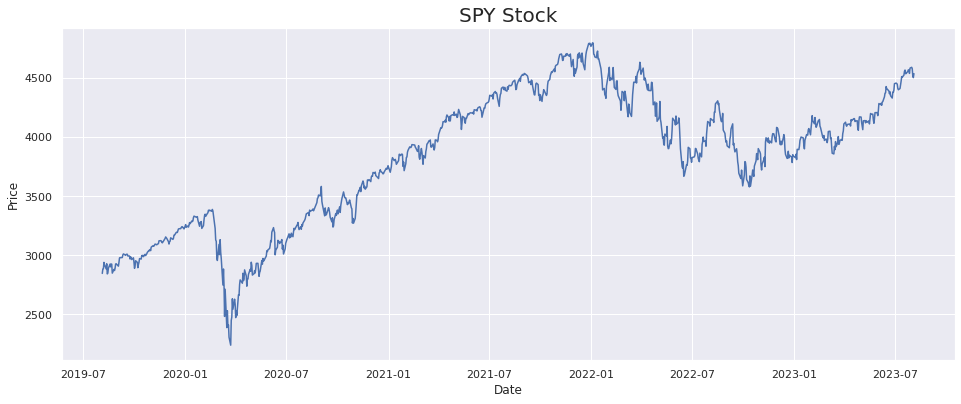

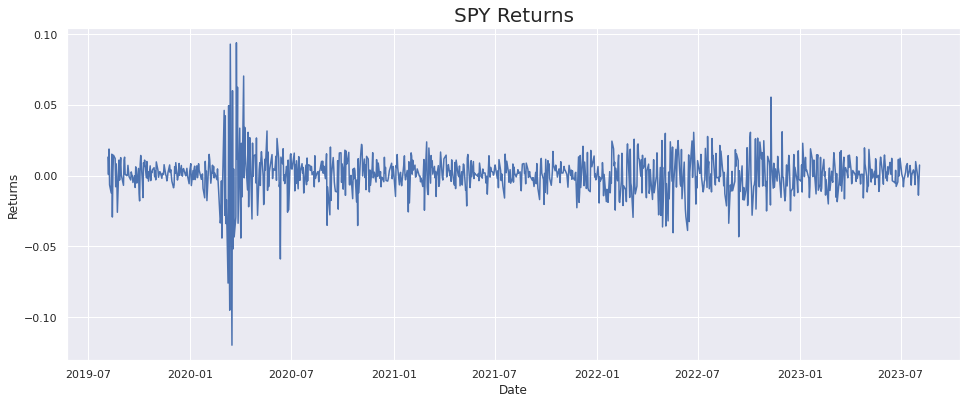

In [2]:
# Define the ticker symbol for the S&P 500 index
ticker = '^GSPC'

# Define the date range for the last 18 months
end_date = pd.Timestamp.now()
start_date = end_date - pd.DateOffset(months=48)

# Retrieve the stock data for the S&P 500 index from Yahoo Finance
stock_data = yf.download(ticker, start=start_date, end=end_date)
stock_data['returns'] = stock_data['Adj Close'].pct_change()

# Data Visualization
plt.plot(stock_data['Adj Close'])
plt.title(f'SPY Stock', size = 20)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

plt.plot(stock_data['returns'].dropna())
plt.title(f'SPY Returns', size = 20)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

The following performs a volatility analysis on historical stock data using the Generalized Autoregressive Conditional Heteroskedasticity (GARCH) model. The steps include loading the returns data, splitting it into training and testing sets, calculating the 30-day moving average volatility, fitting the GARCH(1,1) model to the training set, and finally, plotting the returns, 30-day moving average volatility, and GARCH-estimated volatility for comparison. The visualization helps us understand the volatility patterns and the effectiveness of the GARCH model in forecasting future volatility.

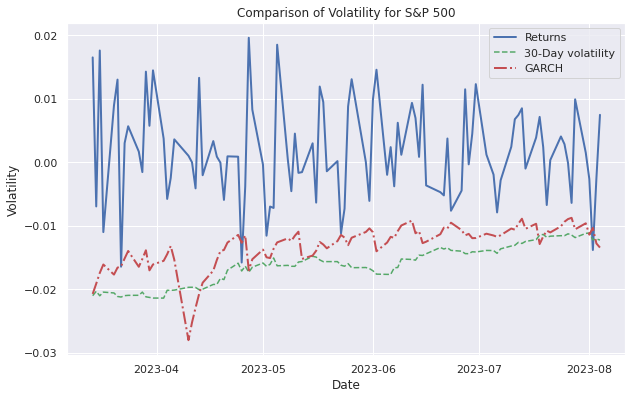

In [13]:
# Step 1: Load Returns Data
returns_data = stock_data['returns'].dropna()

# Step 2: Split Data into Training and Testing Sets
testing_set = returns_data.iloc[-100:]
training_set = returns_data.iloc[:-100]

# Step 3: Calculate 30-Day Moving Average on the Testing Set
moving_average_30d_full = returns_data.rolling(window=30).std()
moving_average_30d = moving_average_30d_full[-100:]*1.96 #95% volatility cofidence

# Step 4: Perform GARCH Modeling on the Training Set
# Rescale the data (multiply by 100)
training_set_scaled = training_set * 100

# Fit the GARCH(1,1) model to the rescaled training set
garch_model = arch_model(training_set_scaled, vol='Garch', p=1, q=1)
results = garch_model.fit(disp='off')

# Step 5: Calculate GARCH volatility for the testing set
garch_volatility_rescaled = results.conditional_volatility[-100:]/100

# Plotting the Results
plt.figure(figsize=(10, 6))
plt.plot(testing_set.index, testing_set, label='Returns', linewidth=2)
plt.plot(testing_set.index, -moving_average_30d, label='30-Day volatility', linestyle='--')
plt.plot(testing_set.index, -garch_volatility_rescaled, label='GARCH', linestyle='-.', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Comparison of Volatility for S&P 500')
plt.legend()
plt.show()


## Value at Risk (VaR)

Value at Risk (VaR) is a widely used risk management metric in finance that estimates the potential loss of an investment or portfolio over a given time horizon and at a certain confidence level. VaR provides a numerical measure of the maximum expected loss under normal market conditions.

### Interpretation

VaR is typically expressed as a negative value or loss amount. For example, if a stock has a VaR of -0.02 (or -2%), it means that there is a 5% (at 95% confidence level) chance that the stock's return will be worse than -2% over the specified time horizon.

### Calculation

To calculate VaR, we use historical data on the investment's returns or price changes. The VaR is determined by estimating the volatility or standard deviation of the returns and then using a statistical method, such as the inverse of the cumulative distribution function, to find the threshold value corresponding to the desired confidence level.

### Example

Let's consider an example: if a portfolio has a one-day VaR of -1.5% at a 95% confidence level, it means that there is a 5% chance that the portfolio's value will decrease by more than 1.5% in one trading day. In other words, if the portfolio's value is 1,000, there is a 5% chance that it will lose more than 15 in one day.

### Uses

VaR is an essential tool for risk managers and investors to assess and quantify potential downside risk in their portfolios. It helps to set risk limits, allocate capital, and make informed decisions about risk exposure. Additionally, VaR allows investors to compare risk across different investments and identify those with lower or higher levels of risk.

However, it's crucial to recognize that VaR has limitations. It assumes that returns follow a normal distribution, which may not hold during extreme market conditions. VaR does not provide information about the magnitude of losses beyond the threshold, and it is a backward-looking measure based on historical data.

As such, VaR should be used in conjunction with other risk management tools and stress tests to provide a more comprehensive understanding of potential risks and losses.

In [4]:
# Set the confidence level for VaR (and CVaR) (95%)
confidence_level = 0.95

# Compute VaR using the inverse of the cumulative standard normal distribution
var = 1.0 * garch_volatility_rescaled.quantile(1 - confidence_level)

print(f'Value at Risk at the {confidence_level*100:.2f}% confidence level: {var:.8f}')


Value at Risk at the 95.00% confidence level: 0.00953305


# Conditional Value at Risk (CVaR)

Conditional Value at Risk (CVaR), also known as Expected Shortfall (ES), is a risk management metric that complements Value at Risk (VaR). While VaR provides an estimate of the potential loss at a specific confidence level, CVaR goes a step further by measuring the average expected loss beyond the VaR threshold.

## Interpretation

CVaR represents the expected value of the tail losses beyond the VaR threshold. It provides a more comprehensive view of the potential downside risk compared to VaR alone. If a portfolio has a VaR of -2% at a 95% confidence level and a CVaR of -3%, it means that, on days when the losses exceed the VaR threshold of -2%, the average loss is expected to be around -3%.

## Calculation

To calculate CVaR, we first determine the VaR at the desired confidence level. Then, we take the average of all losses beyond the VaR threshold. Mathematically, CVaR is the integral of the loss distribution in the tail beyond the VaR threshold, divided by the probability of the tail event. CVaR can also be approximated as the average of the losses exceeding the VaR.


## Uses

CVaR is a valuable metric for risk managers and investors seeking to understand the extent of potential losses beyond the VaR level. Unlike VaR, which only provides a threshold value, CVaR gives insight into the expected magnitude of extreme losses. This information is crucial for developing risk mitigation strategies, determining appropriate hedging measures, and optimizing portfolio allocation.



In [5]:
# Compute CVaR as the expected loss beyond VaR
cvar = 1.0 * garch_volatility_rescaled[garch_volatility_rescaled <= var].mean()

print(f'CVaR at {confidence_level*100:.2f}% confidence level: {cvar:.8f}')

CVaR at 95.00% confidence level: 0.00905197


# Warning!!!!!!!!!!!!

VaR and CVaR calculations are subject to certain limitations. They rely on the assumption that the return data is stationary, normally distributed, and free from autocorrelation. We conduct standard statistical tests on the returns of the SPY index during the testing period, using a significance level (p-value) of 0.05.

In [6]:
# Perform the ADF test
result = adfuller(returns_data)

# Extract the p-value from the test result
p_value = result[1]

# Check if the data is stationary based on the p-value
if p_value <= 0.05:
    print("The data is likely stationary.")
else:
    print("The data is likely non-stationary.")


# Perform the Anderson-Darling test
result = anderson(returns_data)

# Extract the critical values and the significance levels from the test result
critical_values = result.critical_values
significance_level = result.significance_level[2] #set p-value to .05

# Check if the data is normally distributed based on the test statistic and critical values
if result.statistic < significance_level:
    print(f"The data is likely normally distributed.")
else:
    print(f"The data is likely not normally distributed.")
    

# Perform the Ljung-Box test
lb_test_results = sm.stats.diagnostic.acorr_ljungbox(returns_data, lags=[10], return_df=True)

# Extract the test statistic and p-value
test_statistic = lb_test_results.loc[10, 'lb_stat']
p_value = lb_test_results.loc[10, 'lb_pvalue']

# Check if the data is IID based on the test results
alpha = 0.05  # significance level
if p_value < alpha:
    print("The data is likely not i.i.d.")
else:
    print("The data is likely i.i.d.")



The data is likely stationary.
The data is likely not normally distributed.
The data is likely not i.i.d.


As the returns of the S&P500 index are not likely normally distributed nor identically and independentally distributed over the testing period (~1000 trading days), VaR and CVaR may not be accurate measurements.

A Monte-Carlo approach to measure VaR and CVaR involves creating a probability distribution of the returns (using bins) and examining the behavior of this distribution to estimate potential losses. Here's how it works:

1. Simulate Random Returns: Generate a large number of random scenarios for future returns based on the probability distribution of historical returns. Each scenario represents a potential outcome for the returns.

2. Calculate Portfolio Values: Calculate the portfolio values for each simulated scenario. This involves applying the simulated returns to the current portfolio value to project the value of the portfolio under different market conditions.

3. Sort Simulated Returns: Sort the simulated portfolio values in ascending order to identify the potential losses. VaR is then determined by finding the portfolio value at a specific quantile of the sorted distribution (e.g., the 5th percentile for a 95% VaR).

4. Estimate CVaR: CVaR, also known as Expected Shortfall, goes beyond VaR by calculating the average value of the potential losses beyond the VaR threshold. It represents the average severity of losses when they occur.

## GARCH, Var, and CVaR for strategy returns.

VaR and CVaR is often times better suited for the returns on a strategies returns.

We upload the returns on a personally developed long-short equity strategy. We will test if the returns are stationary, normally distributed, and i.i.d. (they will be). We then utilize GARCH modeling to measure the strategies VaR and cVaR.

In [7]:
#Upload the returns of a strategy and the various stocks in the strategy over a backtesting period of 6 months.
strategy_df_returns = pd.read_csv('strat.csv')

print(strategy_df_returns.head())

strat_returns = 1.5*strategy_df_returns['Strategy_Return'].dropna()
print(f'The length of strat_returns is {len(strat_returns)}')
    

       TSLA       AMD      AMZN      AAPL      NVDA       BAC         T  \
0 -0.029039 -0.036035 -0.023726 -0.010605 -0.032816 -0.002050  0.003657   
1  0.024651  0.026151  0.035611  0.036794  0.041640  0.009979  0.016658   
2  0.059349  0.051282  0.014870  0.004089  0.051753 -0.015112 -0.011012   
3 -0.007681  0.012046  0.028732  0.004456  0.017981  0.006787  0.022584   
4  0.036769  0.014842  0.058084  0.021112  0.005783  0.007620 -0.003082   

       INTC     GOOGL      MSFT  ...       APD       AON      REGN       BLK  \
0 -0.004335 -0.021344 -0.029638  ...  0.015558  0.007829  0.003758  0.028619   
1  0.042453  0.013225  0.011785  ... -0.027699 -0.023240 -0.018501 -0.052421   
2  0.020188  0.007786  0.009736  ... -0.004804  0.003254  0.076864 -0.020312   
3  0.004435  0.004544  0.007617  ... -0.003209 -0.003265 -0.027128 -0.005697   
4  0.013927  0.035060  0.030238  ... -0.000320 -0.015814 -0.015724  0.001796   

       EQIX      BKNG       CMG     ^GSPC  Strategy_Value  Strategy_

We test if the return data is likely normally distributed, stationary, and i.i.d.

In [8]:
# Perform the ADF test for stationary
result = adfuller(strat_returns)

# Extract the p-value from the test result
p_value = result[1]

# Check if the data is stationary based on the p-value
if p_value <= 0.05:
    print("The data is likely stationary.")
else:
    print("The data is likely non-stationary.")
    

# Perform Anderson test for normality
result = anderson(strat_returns)

# Extract the critical values and the significance levels from the test result
critical_values = result.critical_values
significance_level = result.significance_level[2]

# Check if the data is normally distributed based on the test statistic and critical values
if result.statistic < significance_level:
    print(f"The data is likely normally distributed.")
else:
    print(f"The data is likely not normally distributed.")
    
    
# Perform the Ljung-Box test for i.i.d
lb_test_results = sm.stats.diagnostic.acorr_ljungbox(strat_returns, lags=[10], return_df=True)

# Extract the test statistic and p-value
test_statistic = lb_test_results.loc[10, 'lb_stat']
p_value = lb_test_results.loc[10, 'lb_pvalue']

# Check if the data is IID based on the test results
alpha = 0.05  # significance level
if p_value < alpha:
    print("The data is likely not i.i.d.")
else:
    print("The data is likely i.i.d.")




The data is likely stationary.
The data is likely normally distributed.
The data is likely i.i.d.


We model the volatility of the strategy with GARCH and use it to compute VaR and cVaR at a 95% confidence interval for the strategy.

In [9]:
# Split Data into Training and Testing Sets
testing_set = strat_returns.iloc[-23:]
training_set = strat_returns.iloc[:-23]

# Perform GARCH Modeling on the Training Set
# Rescale the data (multiply by 100)
training_set_scaled = training_set *100

# Fit the GARCH(1,1) model to the rescaled training set
garch_model = arch_model(training_set_scaled, vol='Garch', p=1, q=1)
results = garch_model.fit(disp='off')

# Calculate GARCH volatility for the testing set
garch_volatility_rescaled = results.conditional_volatility[-100:]/100

In [10]:
# Set the confidence level for VaR (and CVaR) (95%)
confidence_level = .95

# Compute VaR using the inverse of the cumulative standard normal distribution
var = 1.0 * garch_volatility_rescaled.quantile(1 - confidence_level)

print(f'Value at Risk at the {confidence_level*100:.2f}% confidence level: {var:.8f}')

Value at Risk at the 95.00% confidence level: 0.00367296


In [11]:
# Drop NaN values from garch_volatility_rescaled to handle missing values
garch_volatility_rescaled_cleaned = garch_volatility_rescaled.dropna()

# Compute CVaR as the expected loss beyond VaR
cvar = 1.0 * garch_volatility_rescaled_cleaned[garch_volatility_rescaled_cleaned <= var].mean()

print(f'CVaR at {confidence_level*100:.2f}% confidence level: {cvar:.8f}')

CVaR at 95.00% confidence level: 0.00366418
